# Imports and reading data

In [1]:
import pandas as pd
import os

DATA_FOLDER = "data"
CRM_PATH = os.path.join(DATA_FOLDER, "crm_data.csv")
WEB_TRACKING_PATH = os.path.join(DATA_FOLDER, "web_tracking.csv")

In [2]:
crm_df = pd.read_csv(CRM_PATH)
web_tracking_df = pd.read_csv(WEB_TRACKING_PATH)

# EDA + Data validation

In [4]:
crm_df#.columns

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,2024-03-09,Healthcare,US
1,163,Converted,Company_1,2024-03-01,Finance,UK
2,103,Prospect,Company_2,2024-03-02,Healthcare,France
3,163,Lost,Company_3,2024-03-01,SaaS,US
4,171,Lost,Company_4,2024-03-07,Healthcare,Germany
5,151,Converted,Company_5,2024-03-01,Finance,US
6,141,Prospect,Company_6,2024-03-02,E-commerce,Germany
7,117,Lost,Company_7,2024-03-08,Finance,France
8,114,Lost,Company_8,2024-03-09,Finance,UK
9,171,Prospect,Company_9,2024-03-10,Finance,US


In [5]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       60 non-null     int64 
 1   lead_status   60 non-null     object
 2   company       60 non-null     object
 3   sign_up_date  60 non-null     object
 4   industry      60 non-null     object
 5   country       60 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.9+ KB


In [19]:
crm_df.isna().sum()

user_id         0
lead_status     0
company         0
sign_up_date    0
industry        0
country         0
dtype: int64

In [12]:
crm_df.nunique()

user_id         47
lead_status      3
company         60
sign_up_date    11
industry         4
country          4
dtype: int64

In [6]:
crm_df["sign_up_date"] = pd.to_datetime(crm_df["sign_up_date"] )

In [7]:
crm_df["sign_up_date"].describe()

count                     60
mean     2024-03-05 16:24:00
min      2024-03-01 00:00:00
25%      2024-03-02 00:00:00
50%      2024-03-06 00:00:00
75%      2024-03-09 00:00:00
max      2024-03-11 00:00:00
Name: sign_up_date, dtype: object

In [17]:
crm_df[crm_df.user_id.duplicated()] 

,user_id,lead_status,company,sign_up_date,industry,country
3,163,Lost,Company_3,2024-03-01,SaaS,US
9,171,Prospect,Company_9,2024-03-10,Finance,US
20,161,Converted,Company_20,2024-03-11,Finance,US
31,187,Converted,Company_31,2024-03-04,E-commerce,US
33,150,Prospect,Company_33,2024-03-10,SaaS,UK
35,120,Prospect,Company_35,2024-03-06,SaaS,Germany
36,103,Prospect,Company_36,2024-03-07,SaaS,UK
39,161,Converted,Company_39,2024-03-01,Finance,US
40,146,Lost,Company_40,2024-03-03,Finance,US
52,102,Converted,Company_52,2024-03-02,SaaS,US


In [14]:
def plot_column_distribution(df, col_name):
    return df[col_name].value_counts().plot(kind = "bar")

<Axes: xlabel='lead_status'>

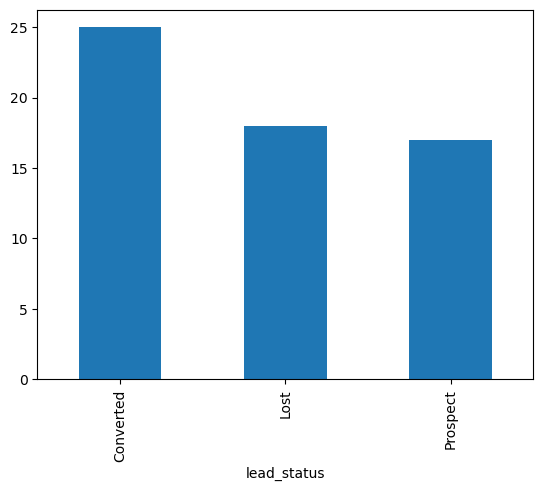

In [20]:
plot_column_distribution(crm_df, "lead_status")

<Axes: xlabel='industry'>

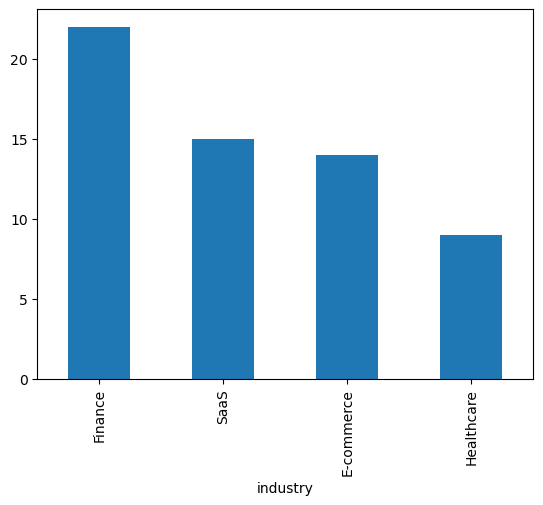

In [15]:
plot_column_distribution(crm_df, "industry")

<Axes: xlabel='country'>

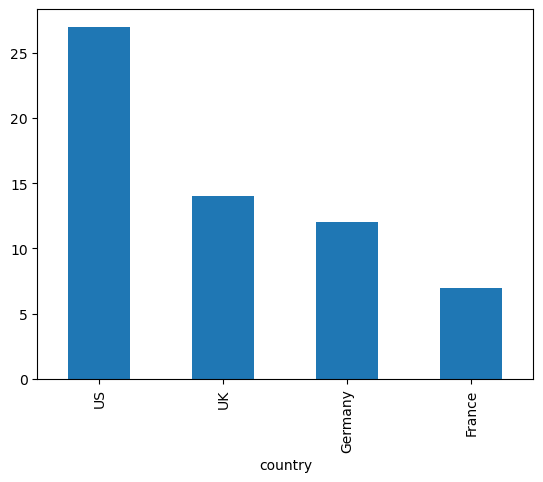

In [16]:
plot_column_distribution(crm_df, "country")

In [ ]:
def get_conversion_rate_by_column(df, column_name):
    """
    Calculate conversion rate by a specific column.
    """
    total_count = df[column_name].value_counts()
    converted_count = df[df["lead_status"] == "Converted"][column_name].value_counts()

    conversion_rate = (converted_count / total_count).fillna(0)
    return conversion_rate

In [44]:
crm_df.groupby("country").describe()

user_id                                                              \
          count        mean    min     25%    50%     75%    max        std   
country                                                                       
France      7.0  138.428571  103.0  110.00  150.0  159.50  177.0  30.231645   
Germany    12.0  160.500000  106.0  147.00  166.5  177.25  192.0  27.301349   
UK         14.0  141.357143  102.0  123.75  146.5  158.50  190.0  25.159819   
US         27.0  156.037037  102.0  137.50  161.0  182.00  199.0  28.976757   

        sign_up_date                                                      \
               count                           mean                  min   
country                                                                    
France             7  2024-03-05 06:51:25.714285824  2024-03-02 00:00:00   
Germany           12            2024-03-04 20:00:00  2024-03-01 00:00:00   
UK                14  2024-03-06 22:17:08.571428608  2024-03-01 00:00:00   
US                27            2024-03-05 12:26:40  2024-03-01 00:00:00   

                                                                        \
                         25%                  50%                  75%   
country                                                                  
France   2024-03-02 12:00:00  2024-03-04 00:00:00  2024-03-08 00:00:00   
Germany  2024-03-01 18:00:00  2024-03-04 12:00:00  2024-03-07 00:00:00   
UK       2024-03-06 00:00:00  2024-03-07 00:00:00  2024-03-09 18:00:00   
US       2024-03-01 00:00:00  2024-03-05 00:00:00  2024-03-09 00:00:00   

                                   
                         max  std  
country                            
France   2024-03-10 00:00:00  NaN  
Germany  2024-03-11 00:00:00  NaN  
UK       2024-03-11 00:00:00  NaN  
US       2024-03-11 00:00:00  NaN

In [59]:
def get_conversion_rate(values):
    # print(values)
    num_converted = values[values == "Converted"].shape[0]
    percentage = num_converted / values.shape[0] * 100
    return percentage
    # converted = values[values["lead_status"] == "Converted"].shape[0]

In [62]:
crm_df.groupby('country')["lead_status"].apply(get_conversion_rate)

country
France     14.285714
Germany    16.666667
UK         42.857143
US         59.259259
Name: lead_status, dtype: float64

In [ ]:
for group, data in crm_df.groupby('industry'):
    print(f"Industry: {group}")
    print(data)
    # print(get_conversion_rate_by_column(data, "country"))
    print("\n")

Industry: E-commerce
    user_id lead_status     company sign_up_date    industry  country
6       141    Prospect   Company_6   2024-03-02  E-commerce  Germany
10      102    Prospect  Company_10   2024-03-11  E-commerce       UK
16      157   Converted  Company_16   2024-03-06  E-commerce       UK
19      107    Prospect  Company_19   2024-03-01  E-commerce       US
21      149        Lost  Company_21   2024-03-10  E-commerce  Germany
23      134        Lost  Company_23   2024-03-06  E-commerce       UK
31      187   Converted  Company_31   2024-03-04  E-commerce       US
43      173   Converted  Company_43   2024-03-06  E-commerce  Germany
46      123        Lost  Company_46   2024-03-09  E-commerce       US
47      160        Lost  Company_47   2024-03-11  E-commerce  Germany
53      121    Prospect  Company_53   2024-03-11  E-commerce       US
54      177        Lost  Company_54   2024-03-03  E-commerce   France
56      183   Converted  Company_56   2024-03-09  E-commerce       US

In [32]:
e_com

,user_id,lead_status,company,sign_up_date,industry,country
6,141,Prospect,Company_6,2024-03-02,E-commerce,Germany
10,102,Prospect,Company_10,2024-03-11,E-commerce,UK
16,157,Converted,Company_16,2024-03-06,E-commerce,UK
19,107,Prospect,Company_19,2024-03-01,E-commerce,US
21,149,Lost,Company_21,2024-03-10,E-commerce,Germany
23,134,Lost,Company_23,2024-03-06,E-commerce,UK
31,187,Converted,Company_31,2024-03-04,E-commerce,US
43,173,Converted,Company_43,2024-03-06,E-commerce,Germany
46,123,Lost,Company_46,2024-03-09,E-commerce,US
47,160,Lost,Company_47,2024-03-11,E-commerce,Germany


In [ ]:

def get_conversion_rate_by_industry(df, industry):
    """
    Calculate conversion rate for a specific industry.
    """
    industry_df = df[df["industry"] == industry]
    total_count = industry_df.shape[0]
    converted_count = industry_df[industry_df["lead_status"] == "Converted"].shape[0]
    
    return converted_count / total_count * 100


In [23]:
crm_df.groupby("industry")["lead_status"].value_counts()

industry    lead_status
E-commerce  Converted      5
            Lost           5
            Prospect       4
Finance     Converted      9
            Lost           8
            Prospect       5
Healthcare  Converted      5
            Lost           2
            Prospect       2
SaaS        Converted      6
            Prospect       6
            Lost           3
Name: count, dtype: int64

In [ ]:
"11 < 2"

In [ ]:
web_tracking_df

In [ ]:
crm_df[crm_df.duplicated()]

In [9]:
web_tracking_df.columns

Index(['user_id', 'session_id', 'timestamp', 'page', 'time_spent_sec',
       'utm_source', 'utm_medium', 'device_type'],
      dtype='object')

In [2]:
print(r"data\new_table")

data\new_table


In [70]:
# Display the first few rows
crm_df.head()

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,2024-03-09,Healthcare,US
1,163,Converted,Company_1,2024-03-01,Finance,UK
2,103,Prospect,Company_2,2024-03-02,Healthcare,France
3,163,Lost,Company_3,2024-03-01,SaaS,US
4,171,Lost,Company_4,2024-03-07,Healthcare,Germany


In [71]:
# Display the first few rows
web_tracking_df.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type
0,151,s000,2024-03-07 12:55:00,/pricing,54,newsletter,referral,mobile
1,192,s001,2024-03-05 14:21:00,/landing,71,linkedin,email,desktop
2,114,s002,2024-03-01 14:25:00,/contact,143,facebook,cpc,desktop
3,171,s003,2024-03-06 16:56:00,/contact,293,newsletter,email,desktop
4,160,s004,2024-03-01 21:41:00,/contact,37,linkedin,organic,tablet


In [96]:
web_tracking_df.groupby('user_id').page.apply(list)

user_id
101    [/contact, /features, /landing, /landing]
102                         [/landing, /contact]
103              [/features, /contact, /contact]
105                                  [/features]
106                                  [/features]
                         ...                    
190                                  [/features]
191                         [/contact, /pricing]
192                         [/landing, /landing]
194                                  [/features]
199                        [/landing, /features]
Name: page, Length: 61, dtype: object

In [72]:
# Create Dimension Tables
lead_status_dim = crm_df[['lead_status']].drop_duplicates().reset_index(drop=True)
lead_status_dim['lead_status_id'] = lead_status_dim.index + 1


In [97]:
def create_2_dim_table(col_name: str) -> None:
    

SyntaxError: incomplete input (766641423.py, line 2)

In [98]:
create

NameError: name 'create' is not defined

In [80]:
company_dim = crm_df[['company']].drop_duplicates().reset_index(drop=True)
company_dim['company_id'] = company_dim.index + 1

In [74]:
industry_dim = crm_df[['industry']].drop_duplicates().reset_index(drop=True)
industry_dim['industry_id'] = industry_dim.index + 1

In [75]:
country_dim = crm_df[['country']].drop_duplicates().reset_index(drop=True)
country_dim['country_id'] = country_dim.index + 1

In [93]:
# Sign-up time breakdown
crm_df['sign_up_datetime'] = pd.to_datetime(crm_df['sign_up_date'])
sign_up_time_dim = crm_df[['sign_up_datetime']].drop_duplicates().reset_index(drop=True)
sign_up_time_dim['sign_up_time_id'] = sign_up_time_dim.index + 1
sign_up_time_dim['sign_up_year'] = sign_up_time_dim['sign_up_datetime'].dt.year
sign_up_time_dim['sign_up_month'] = sign_up_time_dim['sign_up_datetime'].dt.month
sign_up_time_dim['sign_up_week'] = sign_up_time_dim['sign_up_datetime'].dt.isocalendar().week
sign_up_time_dim['sign_up_weekday'] = sign_up_time_dim['sign_up_datetime'].dt.weekday

In [92]:
# User Dimension Table
user_dim = crm_df.merge(company_dim, on="company")\
.merge(industry_dim, on="industry")\
.merge(country_dim, on="country")\
.merge(sign_up_time_dim, on="sign_up_datetime")\
.merge(lead_status_dim, on="lead_status")\
[["user_id","lead_status_id", "industry_id", "company_id", "country_id", "sign_up_time_id"]].drop_duplicates(subset='user_id')

In [85]:
# Prepare Session Data Dimensions
web_tracking_df["timestamp_datetime"] = pd.to_datetime(web_tracking_df['timestamp'])
datetime_dim = web_tracking_df[['timestamp_datetime']].drop_duplicates().reset_index(drop=True)
datetime_dim['datetime_id'] = datetime_dim.index + 1
datetime_dim['year'] = datetime_dim['timestamp_datetime'].dt.year
datetime_dim['month'] = datetime_dim['timestamp_datetime'].dt.month
datetime_dim['week'] = datetime_dim['timestamp_datetime'].dt.isocalendar().week
datetime_dim['weekday'] = datetime_dim['timestamp_datetime'].dt.weekday

In [86]:
page_dim = web_tracking_df[['page']].drop_duplicates().reset_index(drop=True)
page_dim['page_id'] = page_dim.index + 1

In [87]:
utm_source_dim = web_tracking_df[['utm_source']].drop_duplicates().reset_index(drop=True)
utm_source_dim['utm_source_id'] = utm_source_dim.index + 1

In [88]:
utm_medium_dim = web_tracking_df[['utm_medium']].drop_duplicates().reset_index(drop=True)
utm_medium_dim['utm_medium_id'] = utm_medium_dim.index + 1

In [89]:
device_type_dim = web_tracking_df[['device_type']].drop_duplicates().reset_index(drop=True)
device_type_dim['device_type_id'] = device_type_dim.index + 1

In [91]:
# Fact Table
fact_table = web_tracking_df.merge(user_dim, on="user_id")\
.merge(datetime_dim, on="timestamp_datetime")\
.merge(page_dim, on="page")\
.merge(utm_source_dim, on="utm_source")\
.merge(utm_medium_dim, on="utm_medium")\
.merge(device_type_dim, on="device_type")\
[['session_id', 'user_id', 'datetime_id', 'page_id', 'utm_source_id', 'utm_medium_id', 'device_type_id', 'time_spent_sec']]